# SOK-1006 Mikro
## Seminar 2
### Oppgave 2

In [33]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [34]:
# definer symbolene som vi kommer til å bruke
x,p,t,T=sp.symbols('x p t T', positive=True)

In [35]:
# Etterspørsel i likning (1)

def x_d(p,T):
    return 500 - 3.2*(p+T)

#Tilbud i likning (2)

def x_s(p,t):
    return -100+4.3*(p-t)


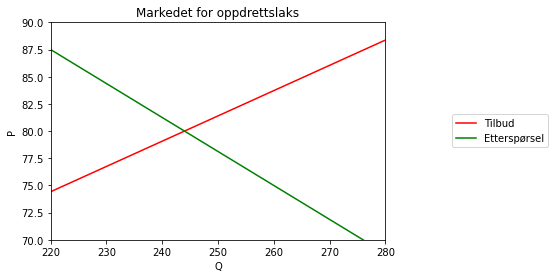

In [36]:
#Tegne markedskryss før avgift
p_num = np.linspace(1,500,100)
fig,ax=plt.subplots()
 
ax.set_ylabel('P')
ax.set_xlabel('Q')
ax.plot(x_s(p_num,0),p_num,label='Tilbud', color='red')
ax.plot(x_d(p_num,0),p_num, label='Etterspørsel',color='green')
             
    
ax.set_ylim([70, 90])
ax.set_xlim([220,280])

ax.legend(bbox_to_anchor=(1.5,0.6))
ax.set_title('Markedet for oppdrettslaks')
plt.show()

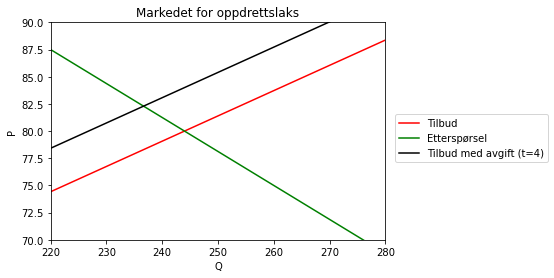

In [37]:
#Tegn tilbudet med en avgift på t=4
ax.plot(x_s(p_num,4),p_num, label='Tilbud med avgift (t=4)', color='black')
ax.legend(bbox_to_anchor=(1.5,0.6))
fig

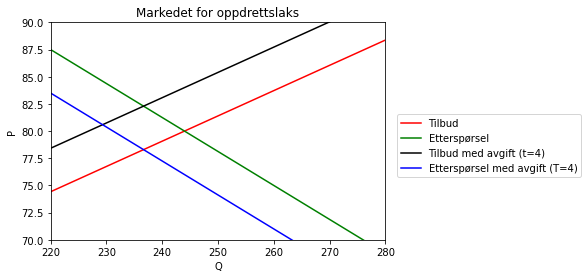

In [38]:
#Tegn etterspørsel med en avgift på T=4
ax.plot(x_d(p_num,4),p_num, label='Etterspørsel med avgift (T=4)', color='blue')
ax.legend(bbox_to_anchor=(1.6,0.6))
fig

Samme kvantum omsatt om avgiften legges på kjøpere eller selgere!

In [39]:
eq_cond=sp.Eq(x_d(p,T),x_s(p,t))
eq_cond

Eq(-3.2*T - 3.2*p + 500, 4.3*p - 4.3*t - 100)

In [40]:
p_eq=sp.solve(eq_cond,p)
p_eq[0]

-0.426666666666667*T + 0.573333333333333*t + 80.0

In [41]:
x_eq=x_s(p_eq[0],t)
x_eq

-1.83466666666667*T - 1.83466666666667*t + 244.0

Legg merke til at vi ser samme tall foran T (avgift lagt på kjøper) og t (avgift lagt på selger).

In [42]:
# Lag funksjoner ut av likevektsverdiene

# Likevektspris som funksjon av t og T

p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq[0]
)

p_eq_fn(t,T)

-0.426666666666667*T + 0.573333333333333*t + 80.0

In [43]:
# Likevektskvantum som funksjon av t og T

x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq
)

x_eq_fn(t,T)

-1.83466666666667*T - 1.83466666666667*t + 244.0

In [44]:
# Kvantum omsatt med avgift på selger på t=4
x_eq_fn(4,0)


236.66133333333332

In [45]:
#Kvantum omstatt med T=4 lagt på kjøper
x_eq_fn(0,4)

236.66133333333332

Kvantum omsatt er det samme uansett hvem det er som avgiften pålegges

In [46]:
p_eq_fn(4,0)

82.29333333333334

In [47]:
p_eq_fn(0,4)

78.29333333333334

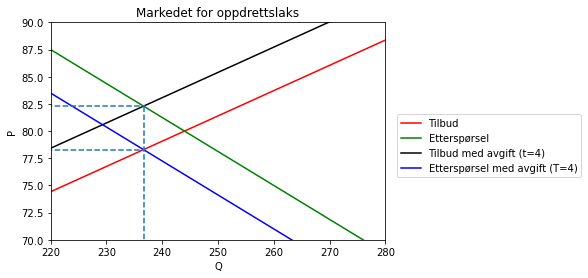

In [48]:
ax.vlines(x_eq_fn(4,0),0, 82.3, linestyles='dashed')
ax.hlines(p_eq_fn(0,4),0,237, linestyles='dashed')
ax.hlines(p_eq_fn(4,0),0,237, linestyles='dashed')
ax.legend(bbox_to_anchor=(1.6,0.6))
fig

#### Deloppgave b)

Dette har vi allerede regnet ut som en del av løsningen til forrige oppgave.    
p_eq_fn(t,T) gir prisen, og x_eq_fn (t,T) gir kvantum omsatt.    
Dersom avgiften legges på produsenter er p_eq_fn(t,0) prisen som betales av konsumenter, mens selgere får p_eq_fn(t,T)-t.

In [49]:
# Regne ut hvor mye av avgiften som betales av konsumenter
# Likevektsprisen uten avgift er 80
andel_kons=(p_eq_fn(4,0)-80)/4
andel_kons

0.5733333333333341

Konsumenter betaler 57.33% av avgiften, selgere betaler resten.     
Intuisjon: se på tilbuds- og etterspørselslikningene - hvem reagerer mest på prisendringer? Koble dette til hvem som betaler størst andel av avgiften.

#### Deloppgave c)

In [50]:
def skatteprov(t,T):
    return t*x_eq_fn(t,T)
skatteprov(t,0)

t*(244.0 - 1.83466666666667*t)

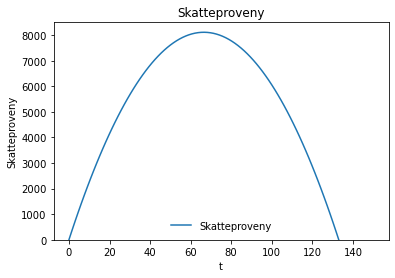

In [51]:
# Anta at T=0, slik at selgere pålegges avgiften

# Lag en numpy rekke for avgift mellom 0 og 150 per enhet

t_num=np.linspace(0,150,100)

plt.plot(t_num, skatteprov(t_num,0),label='Skatteproveny')



#legend:
plt.legend(loc='lower center', frameon=False)

#title
plt.title ('Skatteproveny')

#axis lables
plt.xlabel('t')
plt.ylabel('Skatteproveny')

plt.ylim((0,8500))
#plt.xlim((0,100))
plt.show()

#### Deloppgave d)

En fornuftig avgrensning er som tegnet i figuren (skatteprovenyen kan ikke gå under null)! Vi ser også at det er ett toppunkt på kurven som maksimerer myndighetenes inntekt.    
En slik kurve som tegnet her kalles ofte **Laffer kurve**.

In [52]:
# avgrensning
avgift_maks=sp.solve(skatteprov(t,0),0,t)
avgift_maks

[{t: 132.994186046511}]

Avgiften må ligge i intervallet (0,132.99) kr per enhet.

In [53]:
prov_diff=sp.diff(skatteprov(t,0),t)
prov_diff

244.0 - 3.66933333333334*t

In [54]:
prov_maks=sp.solve(prov_diff,t)[0]
prov_maks

66.4970930232557

In [55]:
skatteprov_maks=skatteprov(prov_maks,0)
skatteprov_maks

8112.64534883719

Da kan vi konkludere at myndighetene maksimerer skatteproveny fra dette markedet ved å sette en avgift på 66.50 kr per enhet solgt, og dette gir en proveny på 8112.65 kr.

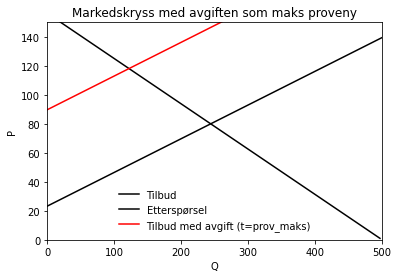

In [59]:
# tegn opprinnelig likevekt i sort, nytt tilbud i rødt

plt.plot(x_s(p_num,0),p_num,label='Tilbud', color='black')
plt.plot(x_d(p_num,0),p_num, label='Etterspørsel',color='black')
plt.plot(x_s(p_num,prov_maks),p_num, label='Tilbud med avgift (t=prov_maks)', color='red')

#legend:
plt.legend(loc='lower center', frameon=False)

#title
plt.title ('Markedskryss med avgiften som maks proveny')

#axis lables
plt.xlabel('Q')
plt.ylabel('P')

plt.ylim((0,150))
plt.xlim((0,500))
plt.show()

In [57]:
# Prisen som konumenter betaler

p_eq_fn(prov_maks,0)

118.125000000000

In [58]:
# Prisen som produsenter får

prod_pris=p_eq_fn(prov_maks,0)-prov_maks
prod_pris

51.6279069767442